# Types of averages: explanation and visualization of arithmetic, geometric and harmonic averages

The arithmetic mean is the most known and used by most people. It is what we would know as the average. It is very simple to calculate, since it is the sum of the parts divided by the number of them.

Let's look at an example of this.

In [6]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# sample of number with normal distribution with mean 0 and standar desviation 1
x = np.random.normal(0, 1, 5000)

# aritmetic mean and standar desviation
x_mean = round(np.mean(x), 3)
x_std = round(np.std(x), 3)

# show data
print(x, '\n')
print('Mean: {}, Standar desviation: {}'.format(x_mean, x_std))

[ 0.1835869  -1.02614562 -0.22071662 ...  0.67608207  1.74115263
  0.4086895 ] 

Mean: -0.018, Standar desviation: 0.999


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


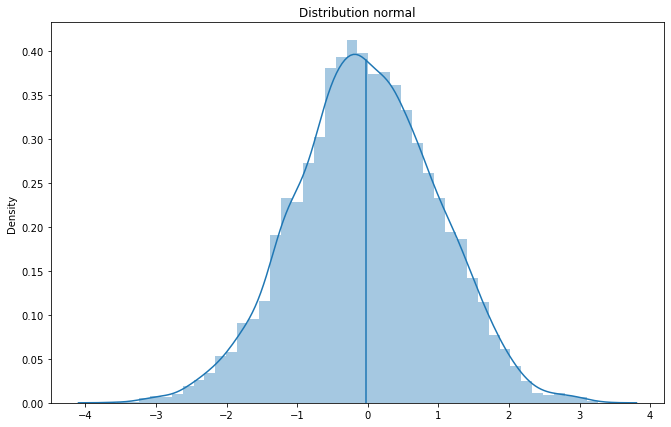

In [23]:
%matplotlib inline

fig, ax = plt.subplots(figsize= (11, 7))

sns.distplot(x)
plt.axvline(x_mean, 0, 0.9)

ax.set_title('Distribution normal')

plt.show()

In [21]:
values_grid(10, (1, 5))

TypeError: 'int' object is not callable

In [24]:

def values_grid(funk, range):
    '''Returns a 2D grid of values from given function when fed all 2-tuples of numbers in given range'''
    x_vals, y_vals = list(range), list(range)

    grid = []
    for x in x_vals:
        row = []
        for y in y_vals:
            row.append(funk(x, y))
        grid.append(row)
    return grid


def plot_funk(
    funk,
    _range=np.arange(10**-4, 4, 0.01),
    p_label='',
    continuous=False,
    all_ticks=False,
    save_file=False    
):
    '''
        Plots the result of a function taking two numerical arguments.
        x and y are the two arguments, the color is the result (lighter is higher).
    '''
    values = values_grid(funk, _range)
    
    rcParams['figure.dpi'] = 80
    rcParams['font.family'] = 'sans-serif'
    figure, ax = plt.subplots(figsize=(6, 4.8))
    plt.subplots_adjust(top=1, bottom=0, left=0.15, right=0.95)
    if continuous:
        kwargs= {
            'cmap': 'gray'
        }
    else:
        kwargs= {
            'cmap': 'gray',
            'norm': colors.BoundaryNorm(
                boundaries=np.arange(-0.125, 4.25, 0.25),
                ncolors=250
            )
        }

    im = plt.imshow(values, **kwargs)
    ax.invert_yaxis()
    if all_ticks and not continuous:
        cbar = plt.colorbar(
            fraction=0.03,
            aspect=24,
            pad=0.1
        )
    else:
        cbar = plt.colorbar(
            fraction=0.03,
            aspect=12,
            pad=0.1
        )
    ax.tick_params(axis='x', labelsize=14, width=1, length=5, pad=6)
    ax.tick_params(axis='y', labelsize=14, width=1, length=4.5, pad=4)
    if all_ticks:
        ax.set_xticks(np.arange(0, 5) * 100)
        ax.set_yticks(np.arange(0, 5) * 100)
        ax.set_xticklabels(range(0, 5), rotation=0)
        ax.set_yticklabels(range(0, 5))
        if continuous:
            cbar.set_ticks([0, 1, 2, 3, 3.99])
            cbar.ax.set_yticklabels(range(0, 5))
        else:
            cbar.set_ticks(np.arange(0, 4.25, 0.25))
            cbar.ax.set_yticklabels(np.arange(0, 4.25, 0.25))
    else:
        ax.set_xticks([-0.5, 400]) # set ticks to zero instead of middle of first color square
        ax.set_yticks([-0.5, 400])
        ax.set_xticklabels(['0', ''], rotation=0)
        ax.set_yticklabels(['0', ''])
        ax.figure.text(0.107, 0.922, '𝑥', family='serif', fontsize=16) # hack in tick labels in different font
        ax.figure.text(0.838, 0.01, '𝑥', family='serif', fontsize=16) # "
        cbar.set_ticks([0, 4])
        cbar.ax.set_yticklabels(['0', ''], fontsize=14)
        ax.figure.text(0.965, 0.655, '𝑥', family='serif', fontsize=16) # hack in colorbar labels in different font

    ax.figure.text(0.17, 0.95, p_label, family='monospace', fontsize=18) # label with p value
    if save_file:
        ax.figure.savefig(save_file)
    plt.show()
    plt.close(figure)

def arithmetic_mean(a, b):
    return (a + b) / 2

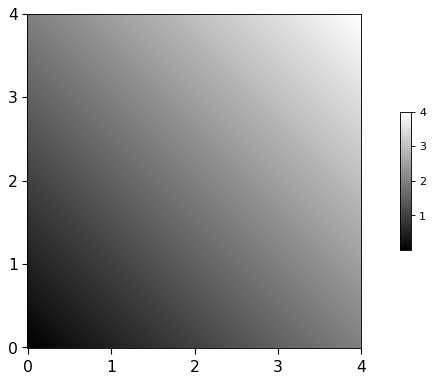

In [25]:
plot_funk(
    arithmetic_mean,
    continuous=True,
    all_ticks=True)